In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
import seaborn as sns
sns.set()

In [18]:
data_100 = pd.read_csv("data_780.csv")
data_100_A_2 = pd.read_csv("data_784.csv")
data_100_B_2 = pd.read_csv("data_787.csv")
data_100_F_2 = pd.read_csv("data_788.csv")
data_100_C_2 = pd.read_csv("data_797.csv")
data_100_D_2 = pd.read_csv("data_801.csv")
data_100_E_2 = pd.read_csv("data_802.csv")
data_100_H_2 = pd.read_csv("data_791.csv")

In [6]:
mean = data_100_A_2.mean()
std_dev = data_100_A_2.std()
z_scores = np.abs((data_100_A_2 - mean) / std_dev)
threshold = 2
good_indices = z_scores['B'] <= threshold

# Extract the non-outlier points
data_100_A_2 = data_100_A_2[good_indices]

In [3]:
corr = data_100.corr()
corr.style.background_gradient(cmap='coolwarm')

In [20]:
#print(data_100.describe())
print()
def get_probs(df, intervention=None):

    nodes = list(df.columns.values)
    print(df.describe())
    
    for i in range(1,len(nodes)):
        #print(nodes[i])
        for j in range(1,len(nodes)):
            if i != j:
                #print(j)
                try:
                    temp_01 = df[df[nodes[j]] >= df[nodes[j]].median()]
                    temp_01_1 = temp_01[temp_01[nodes[i]] < df[nodes[i]].median()]
                    p_01 = len(temp_01_1)/len(temp_01)
                    n_01 = "p({}=0|{}=1)={}".format(nodes[i],nodes[j], p_01)
                    
                    if intervention is not None:
                        i_temp_01 = intervention[intervention[nodes[j]] >= df[nodes[j]].median()]
                        i_temp_01_1 = i_temp_01[i_temp_01[nodes[i]] < df[nodes[i]].median()]
                        i_p_01 = len(i_temp_01_1)/len(i_temp_01)
                        i_n_01 = "p({}=0|{}=1)={}".format(nodes[i],nodes[j], i_p_01)
                        
                        print(n_01 + " & " + i_n_01)
                    
                    else:
                        print(n_01)
                    
                except:
                    pass
                    
                try:
                    temp_11 = df[df[nodes[j]] >= df[nodes[j]].median()]
                    temp_11_1 = temp_11[temp_11[nodes[i]] >= df[nodes[i]].median()]
                    p_11 = len(temp_11_1)/len(temp_11)
                    n_11= "p({}=1|{}=1)={}".format(nodes[i],nodes[j], p_11)
                                        
                    if intervention is not None:
                        i_temp_11 = intervention[intervention[nodes[j]] >= df[nodes[j]].median()]
                        i_temp_11_1 = i_temp_11[i_temp_11[nodes[i]] >= df[nodes[i]].median()]
                        i_p_11 = len(i_temp_11_1)/len(i_temp_11)
                        i_n_11 = "p({}=1|{}=1)={}".format(nodes[i],nodes[j], i_p_11)
                        
                        print(n_11 + " & " + i_n_11)
                    
                    else:
                        print(n_11)
                    
                except:
                    pass
                    
                try:
                    temp_00 = df[df[nodes[j]] < df[nodes[j]].median()]
                    temp_00_1 = temp_00[temp_00[nodes[i]] < df[nodes[i]].median()]
                    p_00 = len(temp_00_1)/len(temp_00)
                    n_00 = "p({}=0|{}=0)={}".format(nodes[i],nodes[j], p_00)
                                        
                    if intervention is not None:
                        i_temp_00 = intervention[intervention[nodes[j]] < df[nodes[j]].median()]
                        i_temp_00_1 = i_temp_00[i_temp_00[nodes[i]] < df[nodes[i]].median()]
                        i_p_00 = len(i_temp_00_1)/len(i_temp_00)
                        i_n_00 = "p({}=0|{}=0)={}".format(nodes[i],nodes[j], i_p_00)
                        
                        print(n_00 + " & " + i_n_00)
                    
                    else:
                        print(n_00)
                    
                except:
                    pass
                    
                try:
                    temp_10 = df[df[nodes[j]] < df[nodes[j]].median()]
                    temp_10_1 = temp_10[temp_10[nodes[i]] >= df[nodes[i]].median()]
                    p_10 = len(temp_10_1)/len(temp_10)
                    n_10 = "p({}=1|{}=0)={}".format(nodes[i],nodes[j], p_10)
                    
                    if intervention is not None:
                        i_temp_10 = intervention[intervention[nodes[j]] < df[nodes[j]].median()]
                        i_temp_10_1 = i_temp_10[i_temp_10[nodes[i]] >= df[nodes[i]].median()]
                        i_p_10 = len(i_temp_10_1)/len(i_temp_10)
                        i_n_10 = "p({}=1|{}=0)={}".format(nodes[i],nodes[j], i_p_10)
                        
                        print(n_10 + " & " + i_n_10)
                    
                    else:
                        print(n_10)
               
                except:
                    pass

                print("-"*20)

        print("_"*20)
    #print(df["Unnamed: 0"])
    
get_probs(data_100, intervention=data_100_D_2)



       Unnamed: 0           A           B           C           D           E  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    49.500000    1.736084    0.619256    0.953458   -0.662421   -0.864412   
std     29.011492    1.642075    1.205715    1.637363    1.558675    2.159097   
min      0.000000   -1.932567   -3.671759   -3.069333   -4.431120   -7.430206   
25%     24.750000    0.830657    0.186483   -0.032146   -1.746743   -2.431823   
50%     49.500000    1.766747    0.632981    1.012797   -0.529172   -0.785116   
75%     74.250000    2.774091    1.064823    2.118094    0.351826    0.444369   
max     99.000000    6.525020    4.657424    5.329115    2.949548    4.843163   

                F  
count  100.000000  
mean    -0.172553  
std      0.878037  
min     -2.102648  
25%     -0.836209  
50%     -0.094032  
75%      0.521496  
max      1.653673  
p(A=0|B=1)=0.48 & p(A=0|B=1)=0.6578947368421053
p(A=1|B=1)=0.52 & p(A=1|B=1)=0.3421052631

In [6]:
corr = data_50.corr()
corr.style.background_gradient(cmap='coolwarm')

In [86]:
corr = data_30.corr()
corr.style.background_gradient(cmap='coolwarm')

In [87]:
corr = data_1000.corr()
corr.style.background_gradient(cmap='coolwarm')

In [9]:
data_100 = np.asarray(data_100)


In [10]:
print(np.mean(data_100[:,1]))
print(np.mean(data_100[:,2]))
print(np.mean(data_100[:,3]))
print(np.mean(data_100[:,4]))
print(np.corrcoef(data_100))

1.7360835778141526
0.6192559774662585
0.9534579625335372
-0.6624210376828938
[[1.         0.79220204 0.16032444 ... 0.19228843 0.21190903 0.14690033]
 [0.79220204 1.         0.64056332 ... 0.35491785 0.3822474  0.32204337]
 [0.16032444 0.64056332 1.         ... 0.70835058 0.72339457 0.70582008]
 ...
 [0.19228843 0.35491785 0.70835058 ... 1.         0.99952007 0.99851456]
 [0.21190903 0.3822474  0.72339457 ... 0.99952007 1.         0.9969583 ]
 [0.14690033 0.32204337 0.70582008 ... 0.99851456 0.9969583  1.        ]]


In [48]:
print(np.mean(data_100_A_0[:,1]))
print(np.mean(data_100_A_0[:,2]))
print(np.mean(data_100_A_0[:,3]))
print(np.mean(data_100_A_0[:,4]))

0.0
0.22383709474441502
0.28161475465686453
0.39616290525558506


In [49]:
print(np.mean(data_100_A_22[:,1]))
print(np.mean(data_100_A_22[:,2]))
print(np.mean(data_100_A_22[:,3]))
print(np.mean(data_100_A_22[:,4]))

2.0
0.0742166486472781
0.20486552724559476
2.575783351352722


In [50]:
print(np.mean(data_100_A_2[:,1]))
print(np.mean(data_100_A_2[:,2]))
print(np.mean(data_100_A_2[:,3]))
print(np.mean(data_100_A_2[:,4]))

-2.0
0.14603581674133329
0.427971365120031
-1.5160358167413333


In [51]:
print(np.mean(data_100_D_0[:,1]))
print(np.mean(data_100_D_0[:,2]))
print(np.mean(data_100_D_0[:,3]))
print(np.mean(data_100_D_0[:,4]))

1.1265929359905085
0.1429039550903576
0.09156884088884228
0.0


In [52]:
print(np.mean(data_100_D_2[:,1]))
print(np.mean(data_100_D_2[:,2]))
print(np.mean(data_100_D_2[:,3]))
print(np.mean(data_100_D_2[:,4]))

1.0529059320512781
0.20090343563583254
0.2601224753610529
2.0


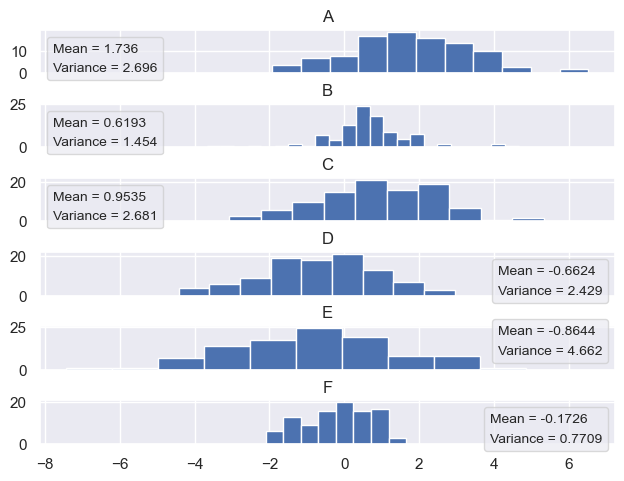

In [12]:
#Histogram
data_100 = pd.read_csv("data_780.csv")
df = data_100

nodes = list(df.columns.values)
fig, ax = plt.subplots(len(nodes)-1, sharex=True)
fig.tight_layout(pad=1)

handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 2


for i in range(1,len(nodes)):
    ax[i-1].hist(df[nodes[i]],bins = 'auto')
    ax[i-1].set_title(nodes[i])
    labels = []
    labels.append("Mean = {0:.4g}".format(df[nodes[i]].mean()))
    labels.append("Variance = {0:.4g}".format(df[nodes[i]].var()))
    ax[i-1].legend(handles, labels, loc='best', fontsize='small', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)
plt.show()


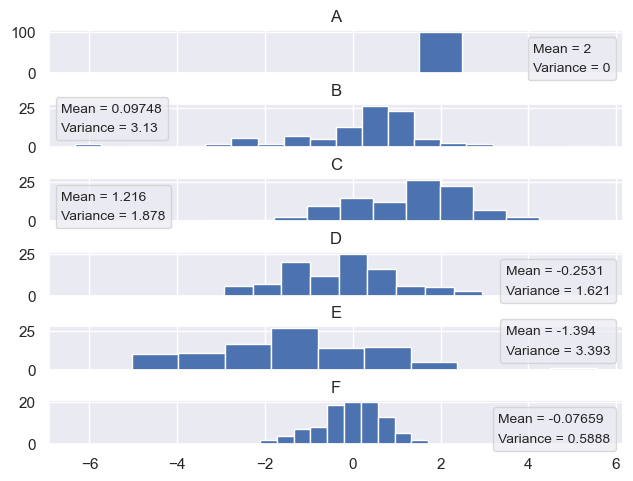

In [25]:
df = data_100_A_2


nodes = list(df.columns.values)
fig, ax = plt.subplots(len(nodes)-1, sharex=True)
fig.tight_layout(pad=1)

handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 2


for i in range(1,len(nodes)):
    ax[i-1].hist(df[nodes[i]],bins = 'auto')
    ax[i-1].set_title(nodes[i])
    labels = []
    labels.append("Mean = {0:.4g}".format(df[nodes[i]].mean()))
    labels.append("Variance = {0:.4g}".format(df[nodes[i]].var()))
    ax[i-1].legend(handles, labels, loc='best', fontsize='small', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)
plt.show()